### Q6
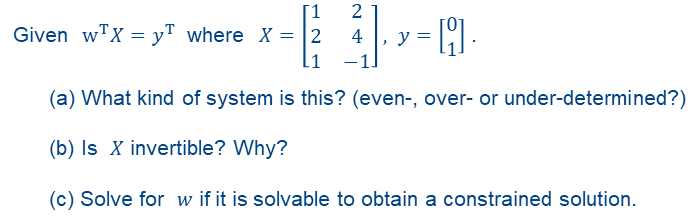

In [3]:
import numpy as np

In [4]:
from numpy.linalg import inv

This imports the inv function from the numpy.linalg module, which is used to compute the inverse of a matrix.

In [6]:
X = np.array([[1, 2], [2, 4], [1,-1]])
X = X.T
print(X)

[[ 1  2  1]
 [ 2  4 -1]]


This creates a 3x4 matrix X:

In [8]:
y = np.array([[0], [1]])
y

array([[0],
       [1]])

This creates a vector y representing the target values:

In [10]:
w1 = X.T @ inv(X @ X.T) @y
print(w1)

[[ 0.06666667]
 [ 0.13333333]
 [-0.33333333]]


This line computes the least squares solution for sw, using the following formula:

In [12]:
# Another method
from numpy.linalg import pinv
w2 = pinv(X) @ y
print(w2)

[[ 0.06666667]
 [ 0.13333333]
 [-0.33333333]]


## Plot the planes

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

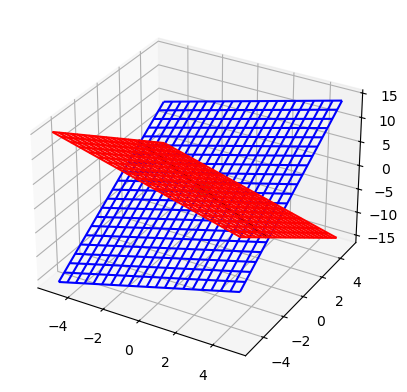

In [16]:
point1  = np.array([0,0,0])
normal1 = np.array([1,2,1])

point2 = np.array([0,0,-1])
normal2 = np.array([2,4,-1])

d1 = -point1.dot(normal1)
d2 = -point2.dot(normal2)

N = 101

# create x,y
xx, yy = np.meshgrid(np.linspace(-5,5,N), np.linspace(-5,5,N))

# calculate corresponding z
z1 = (-normal1[0] * xx - normal1[1]*yy - d1) * 1. / normal1[2]
z2 = (-normal1[0] * xx - normal1[1]*yy - d2) * 1. / normal2[2]

# calculate corresponding z
line_norm = np.cross(normal1, normal2)
# The point (-2, 1, 0) lies on the line
# parametric equation of the line is (line_norm[0]*t-2, line_norm[1]*t+1, 0)

t = np.linspace(-7/6, 1/2, N)

# plot the surface
plt3d = plt.figure()

ax = plt3d.add_subplot(111, projection='3d')

ax.plot_wireframe(xx,yy,z1, color = "red", rstride=5, cstride=5)
ax.plot_wireframe(xx,yy,z2, color = "blue", rstride=5, cstride=5)

ax.plot_wireframe(line_norm[0]*t-2, line_norm[1]*t+1, np.zeros((101,101)), color = "black", rstride=15, cstride=15)

# ax.plot(w2[0], w2[1], w2[2], markerfacecolor='g', markeredgecolor='g', marker='o', makersize=10, aplph=0.6)
ax.plot([0.0667], [0.1333],[-0.3333], markerfacecolor='g', markeredgecolor='g', marker='o', markersize=10, alpha=0.6)
plt.show()
